In [ ]:
# Neural Network

# MNIST
# Dataloader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model Evaluation
# GPU support

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
print(torch.cuda_version)

None


In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform = transforms.ToTensor(), download = True)

In [5]:
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform = transforms.ToTensor())

In [6]:
num_samples = len(train_dataset)
num_samples

60000

In [7]:
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epoch = 2
batch_size = 100
learning_rate = 0.001

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle = False)

In [9]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)
# torch.Size([100, 1, 28, 28]) torch.Size([100]) ---> Output 0th has number of samples, 1st has channel(here in this case is black/white), 2nd has height and 3rd has width

torch.Size([100, 1, 28, 28]) torch.Size([100])


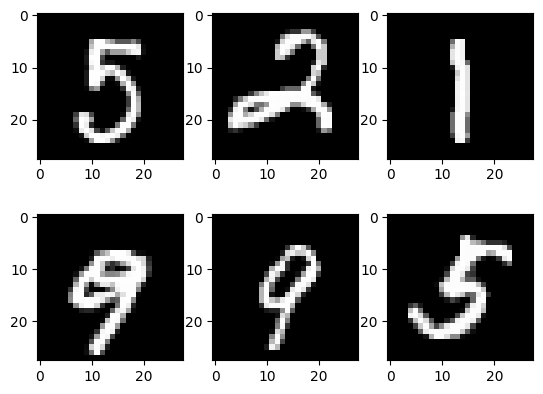

In [10]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
plt.show()

In [14]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self). __init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if((i+1)%100 == 0):
            print(f'epoch {epoch+1}/{num_epoch}, steps {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            print("images shape: ",images.shape)


epoch 1/2, steps 100/600, loss = 0.3957
images shape:  torch.Size([100, 784])
epoch 1/2, steps 200/600, loss = 0.4780
images shape:  torch.Size([100, 784])
epoch 1/2, steps 300/600, loss = 0.2483
images shape:  torch.Size([100, 784])
epoch 1/2, steps 400/600, loss = 0.1769
images shape:  torch.Size([100, 784])
epoch 1/2, steps 500/600, loss = 0.2385
images shape:  torch.Size([100, 784])
epoch 1/2, steps 600/600, loss = 0.2906
images shape:  torch.Size([100, 784])
epoch 2/2, steps 100/600, loss = 0.1427
images shape:  torch.Size([100, 784])
epoch 2/2, steps 200/600, loss = 0.1251
images shape:  torch.Size([100, 784])
epoch 2/2, steps 300/600, loss = 0.2418
images shape:  torch.Size([100, 784])
epoch 2/2, steps 400/600, loss = 0.1782
images shape:  torch.Size([100, 784])
epoch 2/2, steps 500/600, loss = 0.3349
images shape:  torch.Size([100, 784])
epoch 2/2, steps 600/600, loss = 0.1430
images shape:  torch.Size([100, 784])


In [12]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100* n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.2
